In [336]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import numpy as np
import os

color_palette = sns.color_palette()

## Dicionário de Dados

In [337]:
isp_dict = pd.read_csv("Dicionario_dados_isp.csv", sep=";")
isp_dict

,Variável,Descrição da variável,Contagem,Observação,Grupo
0,fmun_cod,Código IBGE de 7 dígitos do município,NaN,NaN,NaN
1,fmun,Nome do município,NaN,NaN,NaN
2,ano,Ano da comunicação da ocorrência,NaN,NaN,NaN
3,mes,Mês da comunicação da ocorrência,NaN,NaN,NaN
4,mes_ano,Mês e ano da comunicação da ocorrência,NaN,NaN,NaN
5,regiao,1-Baixada 2-Capital 3-Grande Niterói 4-Inte...,NaN,NaN,NaN
6,fase,2 - Consolidado sem errata 3 - Consolidado ...,NaN,NaN,NaN
7,hom_doloso,Homicídio doloso,vítima,NaN,CRIMES VIOLENTOS
8,lesao_corp_morte,Lesão corporal seguida de morte,vítima,NaN,CRIMES VIOLENTOS
9,latrocinio,Latrocínio (roubo seguido de morte),vítima,NaN,CRIMES VIOLENTOS


In [338]:
df = pd.read_csv("BaseDPEvolucaoMensalCisp.csv", sep=";", encoding="ISO-8859-1")
df.head(5)

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,47,2,1,0,0,0,637,3
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,26,2,1,0,0,0,473,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3


In [339]:
df.columns

Index(['cisp', 'mes', 'ano', 'mes_ano', 'aisp', 'risp', 'munic', 'mcirc',
       'regiao', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas'

In [340]:
df["cmp"].isna().sum()

4646

In [341]:
df["cmba"].isna().sum()

4646

In [342]:
df["mes_ano"] = df["mes_ano"].str.replace("m", "-")
df.set_index("mes_ano", inplace=True)
df.index = pd.to_datetime(df.index)
df.head(5)

,cisp,mes,ano,aisp,risp,munic,mcirc,regiao,hom_doloso,lesao_corp_morte,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
mes_ano,,,,,,,,,,,,,,,,,,,,,
2003-01-01,1,1,2003,5,1,Rio de Janeiro,3304557,Capital,0,0,...,NaN,NaN,21,2,0,0,0,0,578,3
2003-01-01,4,1,2003,5,1,Rio de Janeiro,3304557,Capital,3,0,...,NaN,NaN,15,6,0,1,0,0,441,3
2003-01-01,5,1,2003,5,1,Rio de Janeiro,3304557,Capital,3,0,...,NaN,NaN,47,2,1,0,0,0,637,3
2003-01-01,6,1,2003,1,1,Rio de Janeiro,3304557,Capital,6,0,...,NaN,NaN,26,2,1,0,0,0,473,3
2003-01-01,7,1,2003,1,1,Rio de Janeiro,3304557,Capital,4,0,...,NaN,NaN,10,1,3,0,0,0,147,3


In [343]:
df = df.drop(columns=["mes", "ano"], axis=1)
df.head(5)

,cisp,aisp,risp,munic,mcirc,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
mes_ano,,,,,,,,,,,,,,,,,,,,,
2003-01-01,1,5,1,Rio de Janeiro,3304557,Capital,0,0,0,0,...,NaN,NaN,21,2,0,0,0,0,578,3
2003-01-01,4,5,1,Rio de Janeiro,3304557,Capital,3,0,0,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2003-01-01,5,5,1,Rio de Janeiro,3304557,Capital,3,0,0,3,...,NaN,NaN,47,2,1,0,0,0,637,3
2003-01-01,6,1,1,Rio de Janeiro,3304557,Capital,6,0,0,6,...,NaN,NaN,26,2,1,0,0,0,473,3
2003-01-01,7,1,1,Rio de Janeiro,3304557,Capital,4,0,0,4,...,NaN,NaN,10,1,3,0,0,0,147,3


## Analise Rio de Janeiro Todo (ignorando Regiões de CISP, AISP e RISP)

In [344]:
df.columns

Index(['cisp', 'aisp', 'risp', 'munic', 'mcirc', 'regiao', 'hom_doloso',
       'lesao_corp_morte', 'latrocinio', 'cvli', 'hom_por_interv_policial',
       'letalidade_violenta', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_transeunte',
       'roubo_celular', 'roubo_em_coletivo', 'roubo_rua', 'roubo_veiculo',
       'roubo_carga', 'roubo_comercio', 'roubo_residencia', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'en

In [345]:
df_analysis_all_rio = df.drop(columns=['cisp', 'aisp', 'risp', 'munic', 'mcirc', 'regiao','fase', 'total_roubos', 'total_furtos'])
df_analysis_all_rio.head(5)

,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
mes_ano,,,,,,,,,,,,,,,,,,,,,
2003-01-01,0,0,0,0,0,0,1,40,0,1,...,NaN,NaN,NaN,21,2,0,0,0,0,578
2003-01-01,3,0,0,3,0,3,0,47,1,4,...,NaN,NaN,NaN,15,6,0,1,0,0,441
2003-01-01,3,0,0,3,0,3,1,73,2,1,...,NaN,NaN,NaN,47,2,1,0,0,0,637
2003-01-01,6,0,0,6,0,6,2,43,2,1,...,NaN,NaN,NaN,26,2,1,0,0,0,473
2003-01-01,4,0,0,4,0,4,2,18,2,0,...,NaN,NaN,NaN,10,1,3,0,0,0,147


In [346]:
df_agg = df_analysis_all_rio.groupby(["mes_ano"]).sum()
df_agg.head(5)

,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
mes_ano,,,,,,,,,,,,,,,,,,,,,
2003-01-01,589,6,20,615,90,705,365,6896,245,163,...,0.0,0.0,0.0,6127,409,144,3,3,2,44793
2003-02-01,583,4,12,599,111,710,361,7099,221,188,...,0.0,0.0,0.0,6047,425,186,5,2,0,45403
2003-03-01,613,5,16,634,113,747,332,6968,236,188,...,0.0,0.0,0.0,5793,462,156,7,7,1,45417
2003-04-01,585,11,14,610,125,735,297,6441,215,207,...,0.0,0.0,0.0,5626,346,120,4,4,1,44184
2003-05-01,599,6,20,625,96,721,381,5843,189,228,...,0.0,0.0,0.0,5436,417,147,4,4,1,45572


In [347]:
def create_features(dataframe: pd.DataFrame) -> pd.DataFrame:
    dataframe["mes"] = dataframe.index.month
    dataframe["ano"] = dataframe.index.year
    return dataframe

In [348]:
df_agg = create_features(df_agg)
df_agg.head(5)

,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,mes,ano
mes_ano,,,,,,,,,,,,,,,,,,,,,
2003-01-01,589,6,20,615,90,705,365,6896,245,163,...,0.0,6127,409,144,3,3,2,44793,1,2003
2003-02-01,583,4,12,599,111,710,361,7099,221,188,...,0.0,6047,425,186,5,2,0,45403,2,2003
2003-03-01,613,5,16,634,113,747,332,6968,236,188,...,0.0,5793,462,156,7,7,1,45417,3,2003
2003-04-01,585,11,14,610,125,735,297,6441,215,207,...,0.0,5626,346,120,4,4,1,44184,4,2003
2003-05-01,599,6,20,625,96,721,381,5843,189,228,...,0.0,5436,417,147,4,4,1,45572,5,2003


In [349]:
def plot_time_series_event(dataframe: pd.DataFrame, columns: list, title: str) -> None:
    df = dataframe.filter(columns)
    df.plot(style=".", figsize=(15, 5), color=color_palette[0], title=title)
    plt.show()

def plot_line_plot(dataframe: pd.DataFrame, column: str, title: str, color=color_palette[1]) -> None:
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x=dataframe.index, y=column,
                 color=color,
             data=dataframe, ax=ax)
    ax.set_title(title)
    plt.show()

def plot_compare_line_plot(dataframe: pd.DataFrame, columns: list, title: str) -> None:
    fig, ax = plt.subplots(figsize=(15, 5))
    colors = sns.color_palette('pastel', n_colors=len(columns))

    for column, color in zip(columns, colors):
        sns.lineplot(x=dataframe.index, y=column,
                     label=column,
                     color=color,
                     data=dataframe, ax=ax)

    ax.set_title(title)
    ax.legend() 
    plt.show()

def get_variable_description(var: str) -> str:
    title = isp_dict.loc[isp_dict["Variável"] == var]
    return title["Descrição da variável"].values[0]

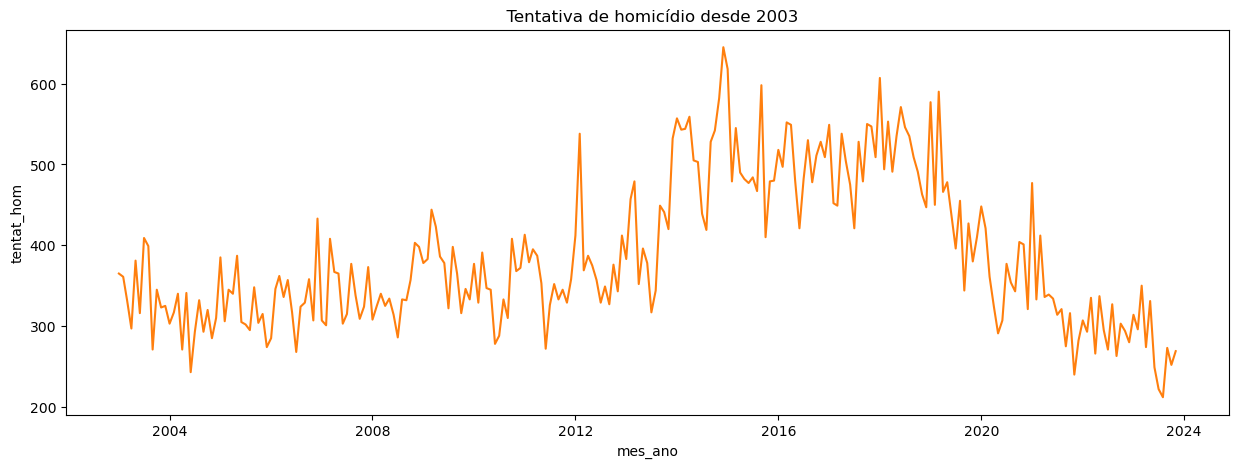

In [350]:
title = get_variable_description("tentat_hom")
plot_line_plot(df_agg, column="tentat_hom", title=f"{title} desde 2003")

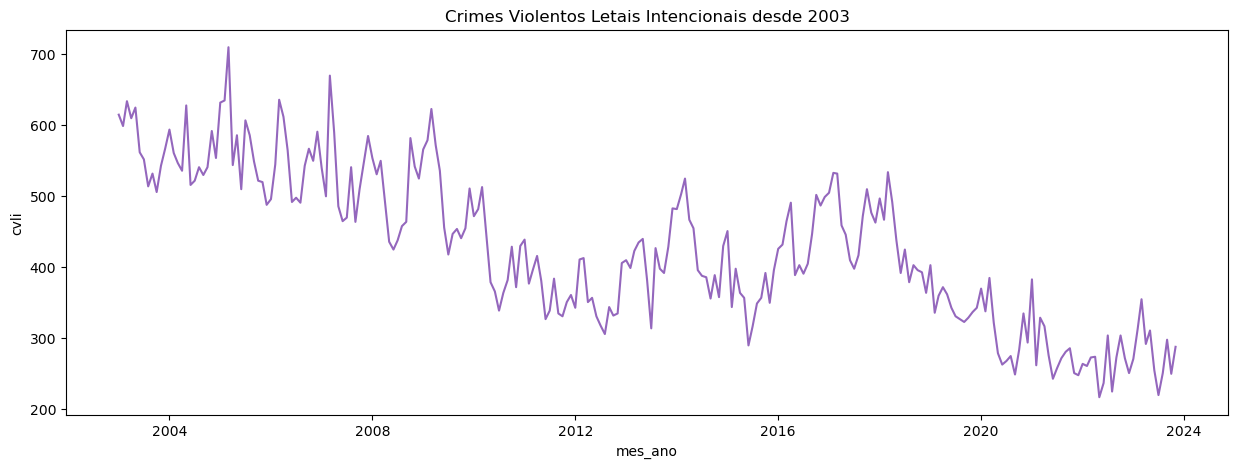

In [351]:
title = get_variable_description("cvli")
plot_line_plot(df_agg, column="cvli", title=f"{title} desde 2003", color=color_palette[4])

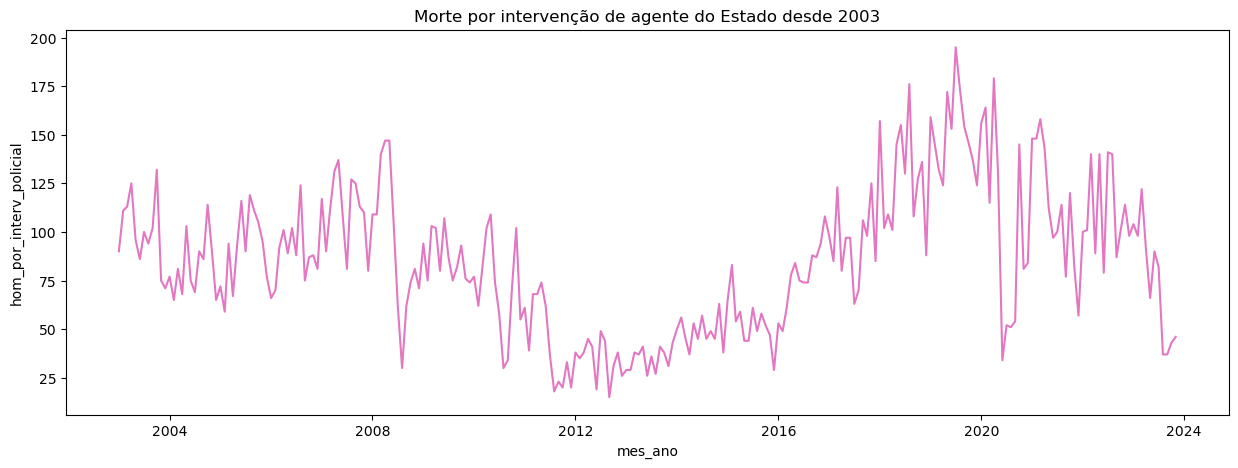

In [352]:
title = get_variable_description("hom_por_interv_policial")
plot_line_plot(df_agg, column="hom_por_interv_policial", title=f"{title} desde 2003", color=color_palette[6])

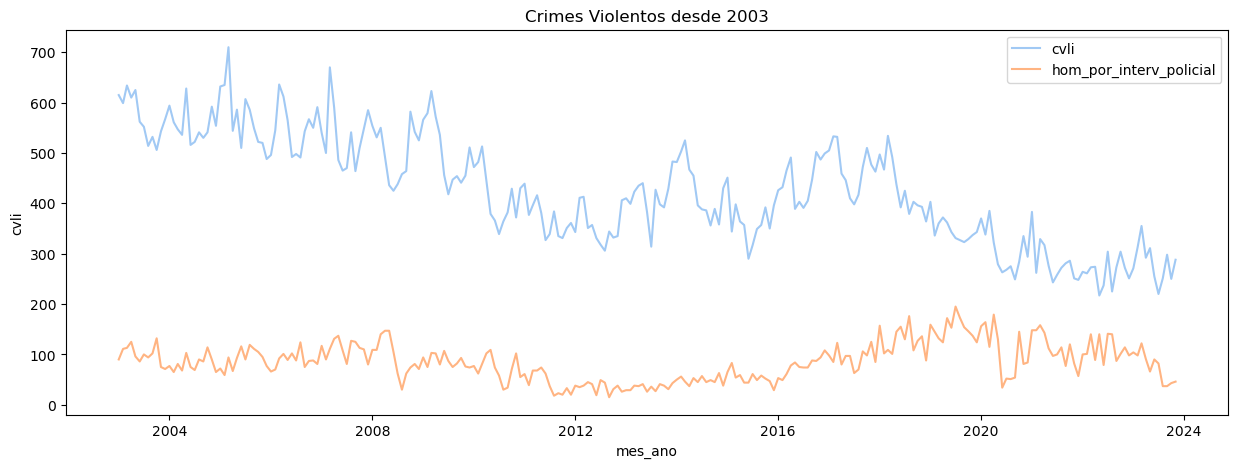

In [353]:
plot_compare_line_plot(df_agg, columns=[ "cvli", "hom_por_interv_policial"], title="Crimes Violentos desde 2003")

In [354]:
df_filtered = df_agg.filter([ "cvli","tentat_hom", "hom_por_interv_policial"])
df_filtered.head(5)

,cvli,tentat_hom,hom_por_interv_policial
mes_ano,,,
2003-01-01,615,365,90
2003-02-01,599,361,111
2003-03-01,634,332,113
2003-04-01,610,297,125
2003-05-01,625,381,96


In [355]:
df_filtered.corr()

,cvli,tentat_hom,hom_por_interv_policial
cvli,1.000000,0.081011,0.062087
tentat_hom,0.081011,1.000000,0.013836
hom_por_interv_policial,0.062087,0.013836,1.000000


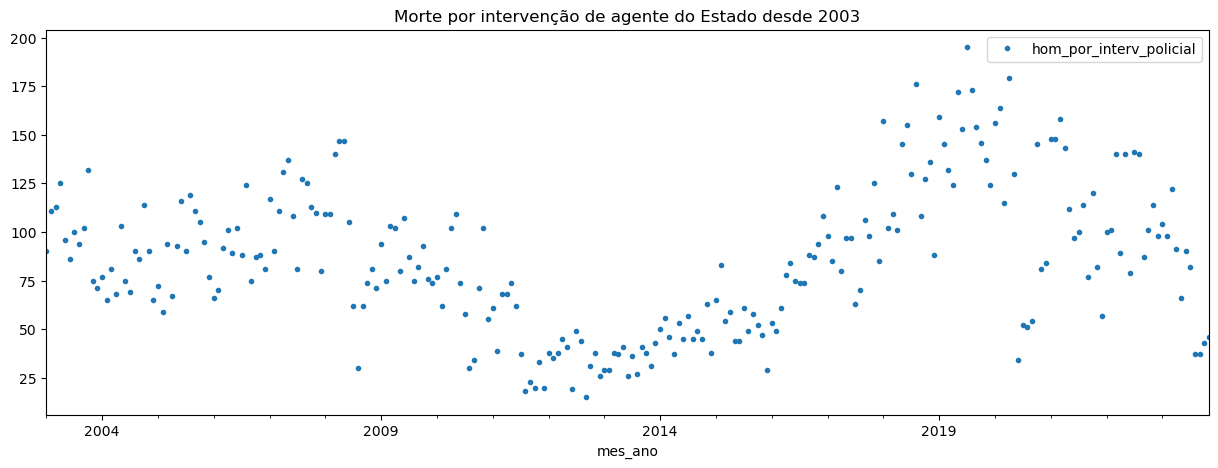

In [356]:
title = get_variable_description("hom_por_interv_policial")
plot_time_series_event(df_agg, columns=["hom_por_interv_policial"], title=f"{title} desde 2003")

<Axes: ylabel='Frequency'>

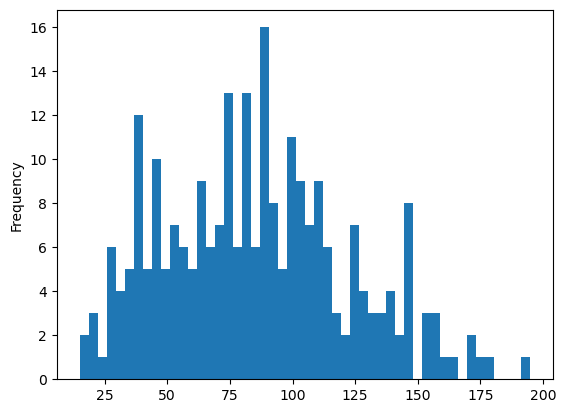

In [357]:
df_agg["hom_por_interv_policial"].plot(kind="hist", bins=50)

In [358]:
df_agg["hom_por_interv_policial"].loc[df_agg["hom_por_interv_policial"] < 25]

mes_ano
2011-08-01    18
2011-09-01    23
2011-10-01    20
2011-12-01    20
2012-06-01    19
2012-09-01    15
Name: hom_por_interv_policial, dtype: int64

## Criação do Modelo

In [359]:
import xgboost as xgb 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [360]:
tss = TimeSeriesSplit(n_splits=5)
df_agg = df_agg.sort_index()
model_data = df_agg.filter(['hom_por_interv_policial'])

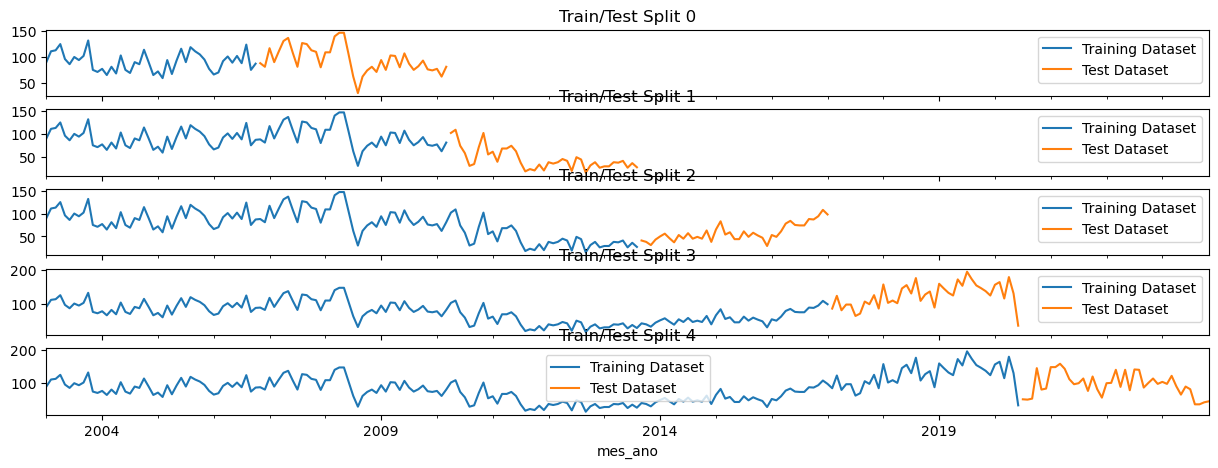

In [361]:
fig, axs = plt.subplots(5, 1, figsize=(15,5),sharex=True)
fold = 0
for train_idx, val_idx in tss.split(model_data):
    train = model_data.iloc[train_idx]
    test = model_data.iloc[val_idx]
    train.plot(ax=axs[fold], label="Training Dataset", title=f"Train/Test Split {fold}")
    test.plot(ax=axs[fold], label="Test Dataset")
    axs[fold].legend(["Training Dataset", "Test Dataset"])
    fold +=1

In [362]:
model_data

,hom_por_interv_policial
mes_ano,
2003-01-01,90
2003-02-01,111
2003-03-01,113
2003-04-01,125
2003-05-01,96
...,...
2023-07-01,82
2023-08-01,37
2023-09-01,37


In [363]:
def create_lag_features(data, num_lags, column_name):
    for i in range(1, num_lags+1):
        data[column_name] = data["hom_por_interv_policial"].shift(num_lags)
    return data

In [364]:
df_agg = df_agg.sort_index()
model_data = df_agg.filter(['hom_por_interv_policial'])
model_data = create_features(model_data)
model_data = create_lag_features(model_data, 12, "lag1")
model_data = create_lag_features(model_data, 24, "lag2")
model_data = create_lag_features(model_data, 36, "lag3")

In [365]:
model_data

,hom_por_interv_policial,mes,ano,lag1,lag2,lag3
mes_ano,,,,,,
2003-01-01,90,1,2003,NaN,NaN,NaN
2003-02-01,111,2,2003,NaN,NaN,NaN
2003-03-01,113,3,2003,NaN,NaN,NaN
2003-04-01,125,4,2003,NaN,NaN,NaN
2003-05-01,96,5,2003,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-07-01,82,7,2023,141.0,100.0,52.0
2023-08-01,37,8,2023,140.0,114.0,51.0
2023-09-01,37,9,2023,87.0,77.0,54.0


In [372]:
tss = TimeSeriesSplit(n_splits=5)

fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(model_data):
    train = model_data.iloc[train_idx]
    test = model_data.iloc[val_idx]

    FEATURES = ['mes', 'ano', 'lag1', 'lag2', 'lag3']
    TARGET = 'hom_por_interv_policial'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5,booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=2,
                       learning_rate=0.1,
                       reg_lambda=1,
                       tree_method='hist',
                       max_bin=150,
                       max_leaves=2)
    
    reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[0]	validation_0-rmse:83.32302	validation_1-rmse:89.59350


[100]	validation_0-rmse:12.45836	validation_1-rmse:25.31912
[105]	validation_0-rmse:12.36879	validation_1-rmse:25.41765
[0]	validation_0-rmse:86.04270	validation_1-rmse:42.09415
[56]	validation_0-rmse:17.98914	validation_1-rmse:50.54371
[0]	validation_0-rmse:75.55468	validation_1-rmse:57.73059
[78]	validation_0-rmse:17.18516	validation_1-rmse:32.41341
[0]	validation_0-rmse:71.30761	validation_1-rmse:125.35129
[100]	validation_0-rmse:17.14378	validation_1-rmse:51.30818
[200]	validation_0-rmse:15.74623	validation_1-rmse:49.85879
[231]	validation_0-rmse:15.44700	validation_1-rmse:49.92170
[0]	validation_0-rmse:82.87112	validation_1-rmse:93.02302
[64]	validation_0-rmse:21.50958	validation_1-rmse:46.10018


In [373]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores {scores}')

Score across folds 32.2895
Fold scores [25.098557348622556, 22.956306016373503, 29.66455025703613, 49.63885176971239, 34.08918490523805]


In [325]:
FEATURES = ['mes', 'ano', 'lag1', 'lag2', 'lag3']
TARGET = 'hom_por_interv_policial'

X_train = model_data[FEATURES]
y_train = model_data[TARGET]


reg = xgb.XGBRegressor(base_score=0.5,booster='gbtree',
                       n_estimators=500,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=2,
                       learning_rate=0.1,
                       reg_lambda=1,
                       tree_method='hist',
                       max_bin=150,
                       max_leaves=2)

reg.fit(X_train, y_train, eval_set=[(X_train, y_train)], verbose=100)

[0]	validation_0-rmse:84.63949
[100]	validation_0-rmse:23.99653
[200]	validation_0-rmse:22.07101
[300]	validation_0-rmse:20.89460
[400]	validation_0-rmse:20.05597
[499]	validation_0-rmse:19.40762


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=150,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [326]:
model_data.index.max()

Timestamp('2023-11-01 00:00:00')

In [327]:
future = {"mes": [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], "ano": [2023, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024] }
future_df = pd.DataFrame(future)
future_df['mes_ano'] = future_df['ano'].astype(str) + '-' + future_df['mes'].astype(str).str.zfill(2)
future_df["mes_ano"] = pd.to_datetime(future_df["mes_ano"])
future_df.set_index("mes_ano", inplace=True)
model_data = df_agg.filter(['hom_por_interv_policial'])
future_df["isFuture"] = True
model_data["isFuture"] = False
model_data_and_future = pd.concat([model_data, future_df])


In [328]:
model_data_and_future

,hom_por_interv_policial,isFuture,mes,ano
mes_ano,,,,
2003-01-01,90.0,False,NaN,NaN
2003-02-01,111.0,False,NaN,NaN
2003-03-01,113.0,False,NaN,NaN
2003-04-01,125.0,False,NaN,NaN
2003-05-01,96.0,False,NaN,NaN
...,...,...,...,...
2024-07-01,NaN,True,7.0,2024.0
2024-08-01,NaN,True,8.0,2024.0
2024-09-01,NaN,True,9.0,2024.0


In [329]:
model_data_and_future = create_features(model_data_and_future)
model_data_and_future = create_lag_features(model_data_and_future, 12, "lag1")
model_data_and_future = create_lag_features(model_data_and_future, 24, "lag2")
model_data_and_future = create_lag_features(model_data_and_future, 36, "lag3")

In [330]:
future_with_features = model_data_and_future.query('isFuture').copy()
future_with_features

,hom_por_interv_policial,isFuture,mes,ano,lag1,lag2,lag3
mes_ano,,,,,,,
2023-12-01,NaN,True,12,2023,98.0,57.0,84.0
2024-01-01,NaN,True,1,2024,104.0,100.0,148.0
2024-02-01,NaN,True,2,2024,98.0,101.0,148.0
2024-03-01,NaN,True,3,2024,122.0,140.0,158.0
2024-04-01,NaN,True,4,2024,91.0,89.0,143.0
2024-05-01,NaN,True,5,2024,66.0,140.0,112.0
2024-06-01,NaN,True,6,2024,90.0,79.0,97.0
2024-07-01,NaN,True,7,2024,82.0,141.0,100.0
2024-08-01,NaN,True,8,2024,37.0,140.0,114.0


In [331]:
future_with_features["hom_por_interv_policial"] = reg.predict(future_with_features[FEATURES])

<Axes: title={'center': 'Previsão Mortalidade po intervenção do Estado 2024'}, xlabel='mes_ano'>

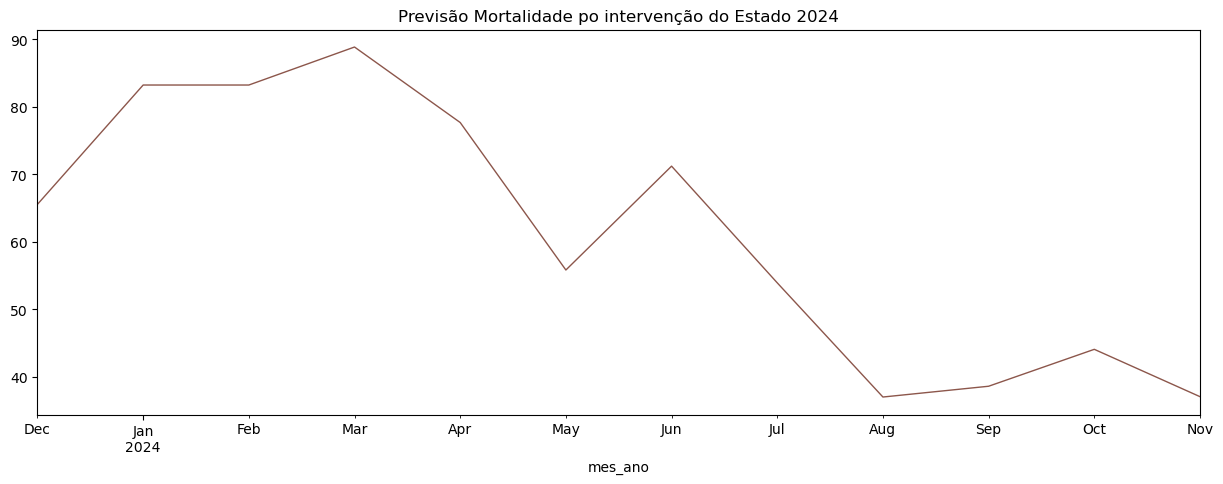

In [332]:
future_with_features["hom_por_interv_policial"].plot(figsize=(15,5), color=color_palette[5], ms=1, lw=1, title="Previsão Mortalidade po intervenção do Estado 2024")

In [333]:
future_with_features

,hom_por_interv_policial,isFuture,mes,ano,lag1,lag2,lag3
mes_ano,,,,,,,
2023-12-01,65.552361,True,12,2023,98.0,57.0,84.0
2024-01-01,83.239250,True,1,2024,104.0,100.0,148.0
2024-02-01,83.239250,True,2,2024,98.0,101.0,148.0
2024-03-01,88.873672,True,3,2024,122.0,140.0,158.0
2024-04-01,77.679298,True,4,2024,91.0,89.0,143.0
2024-05-01,55.812191,True,5,2024,66.0,140.0,112.0
2024-06-01,71.210770,True,6,2024,90.0,79.0,97.0
2024-07-01,53.909523,True,7,2024,82.0,141.0,100.0
2024-08-01,36.979755,True,8,2024,37.0,140.0,114.0


<Axes: title={'center': 'Mortalidade por intervenção do Estado desde 2003'}, xlabel='mes_ano'>

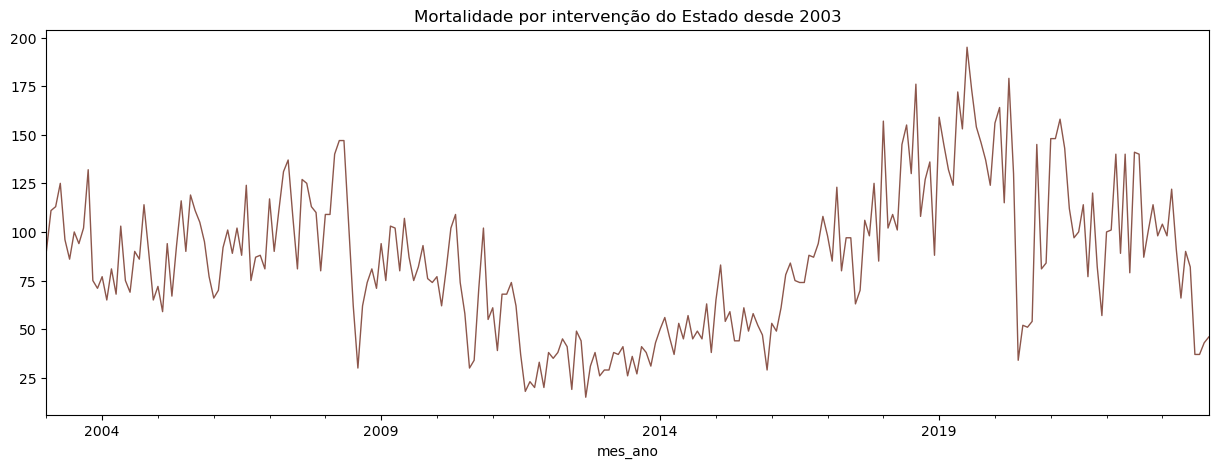

In [379]:
past_with_features = model_data_and_future.query('isFuture == False').copy()
past_with_features["hom_por_interv_policial"].plot(figsize=(15,5), color=color_palette[5], ms=1, lw=1, title="Mortalidade por intervenção do Estado desde 2003")

<Axes: title={'center': 'Mortalidade por intervenção do Estado 2023'}, xlabel='mes_ano'>

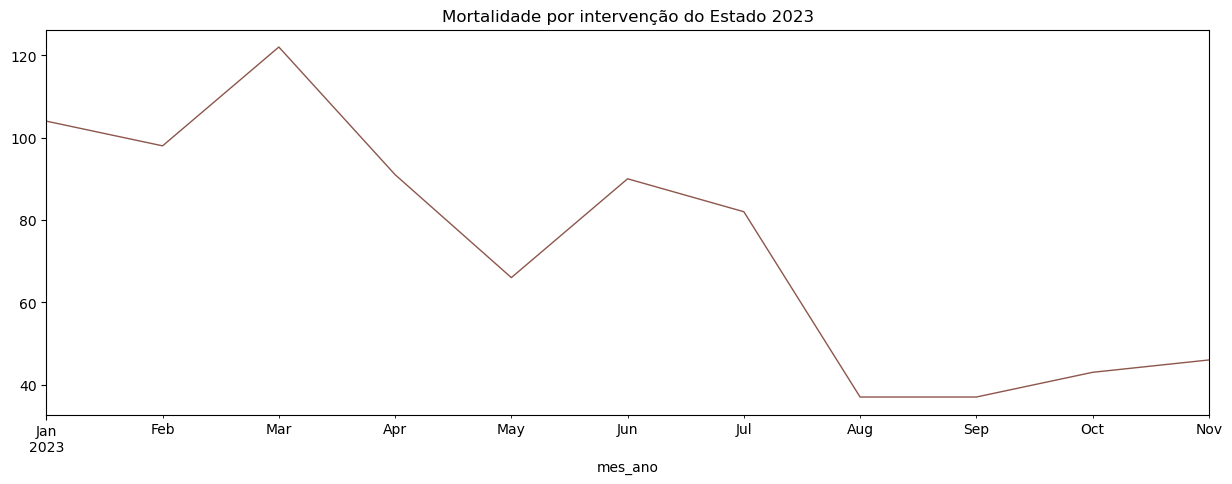

In [380]:
past_with_features_2023 = past_with_features.loc[past_with_features["ano" ] == 2023].copy()
past_with_features_2023["hom_por_interv_policial"].plot(figsize=(15,5), color=color_palette[5], ms=1, lw=1, title="Mortalidade por intervenção do Estado 2023")

<Axes: title={'center': 'Mortalidade por intervenção do Estado 2023'}, xlabel='mes_ano'>

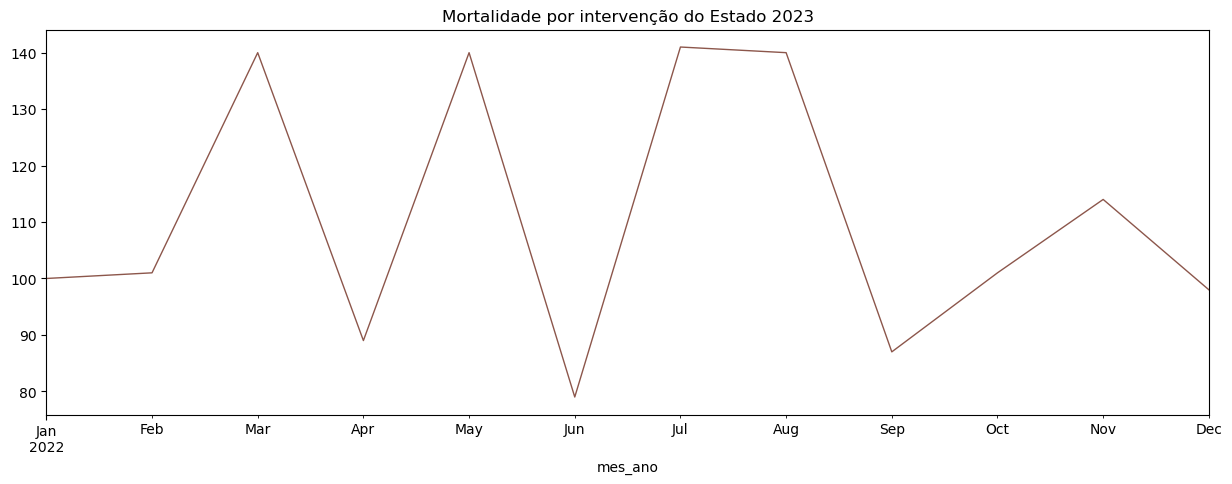

In [381]:
past_with_features_2022 = past_with_features.loc[past_with_features["ano" ] == 2022].copy()
past_with_features_2022["hom_por_interv_policial"].plot(figsize=(15,5), color=color_palette[5], ms=1, lw=1, title="Mortalidade por intervenção do Estado 2023")